# The Sparks Foundation
# Data Science & Business Analytics intern (June-2022)
# Aurthor: Tejal Hande
# Task 2 : Prediction using Unsupervised ML

From the given "iris" dataset, predict optimum number of clusters and representing it visually



In [2]:
# Importing all required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset
df=pd.read_csv(r'C:\Users\kishori arjun shinde\Downloads\Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.drop('Id',axis=1,inplace=True)

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Finding the optimum cluster of K means

1.We are going to use elbow method for finding optimum number of clusters for K means

2.For this we need to plot inertia graph

3.inertia tells us how far away the points within clusters are.therefore, a small inertia is aimed for. the range of inertia's value starts from zero and goes up

# Calculating inertia

In [10]:
x=df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
WCSS=[]      #within cluster sum of squares

for i in range (1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    
    km.fit(x)
    WCSS.append(km.inertia_)

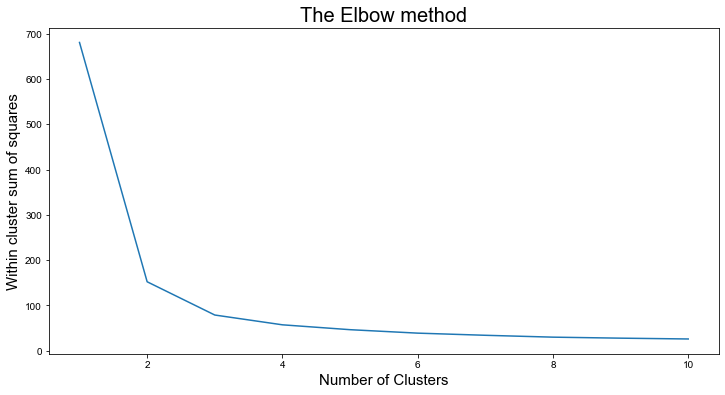

In [11]:
# Plotting inertia Graph
plt.figure(figsize=(12,6))
plt.plot(range(1,11),WCSS)
sns.set_style('darkgrid')
plt.title('The Elbow method',size=20)
plt.xlabel('Number of Clusters',size=15)
plt.ylabel('Within cluster sum of squares',size=15)
plt.show()

1.The optimum clusters where the elbow occurs

2.After 3 the slope of graph decreases by small amount,Suggesting that algorithm has almost converged

3.We can say that '3' clusters are optimum

# Creating K-means classifire

In [12]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)

y_kmeans=kmeans.fit_predict(x)

# Plotting the clusters

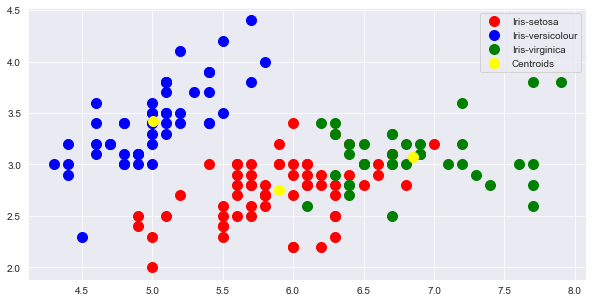

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans==0, 0],x[y_kmeans==0, 1],s=100,c='red')
plt.scatter(x[y_kmeans==1, 0],x[y_kmeans==1, 1],s=100,c='blue')
plt.scatter(x[y_kmeans==2, 0],x[y_kmeans==2, 1],s=100,c='green')

# Centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow')
plt.legend(['Iris-setosa','Iris-versicolour','Iris-virginica','Centroids'])

plt.show()

# Thank You